In [13]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_ef_res import FCFERes
from notebooks.daudt.net_trainer import get_img_trio

In [10]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

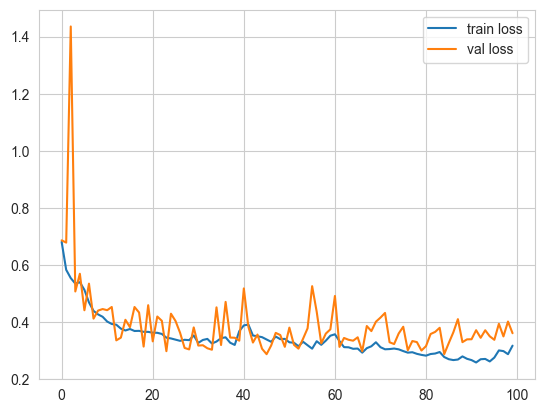

In [4]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [11]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.836764,0.127023,0.564682,0.763412,0.874298,0.943741,0.985916
change accuracy,33.0,0.526497,0.400540,0.000000,0.143780,0.611111,0.940036,1.000000
no change accuracy,33.0,0.835271,0.147723,0.480463,0.771736,0.860912,0.955914,1.000000
precision,32.0,0.165220,0.160307,0.000000,0.025980,0.136583,0.236025,0.548987
recall,33.0,0.512895,0.395288,0.000000,0.109807,0.603432,0.922307,1.000000
dice,29.0,0.257001,0.210054,0.003011,0.048499,0.232943,0.396965,0.688285
kappa,33.0,0.173591,0.196466,-0.057480,0.001769,0.120659,0.271350,0.655358


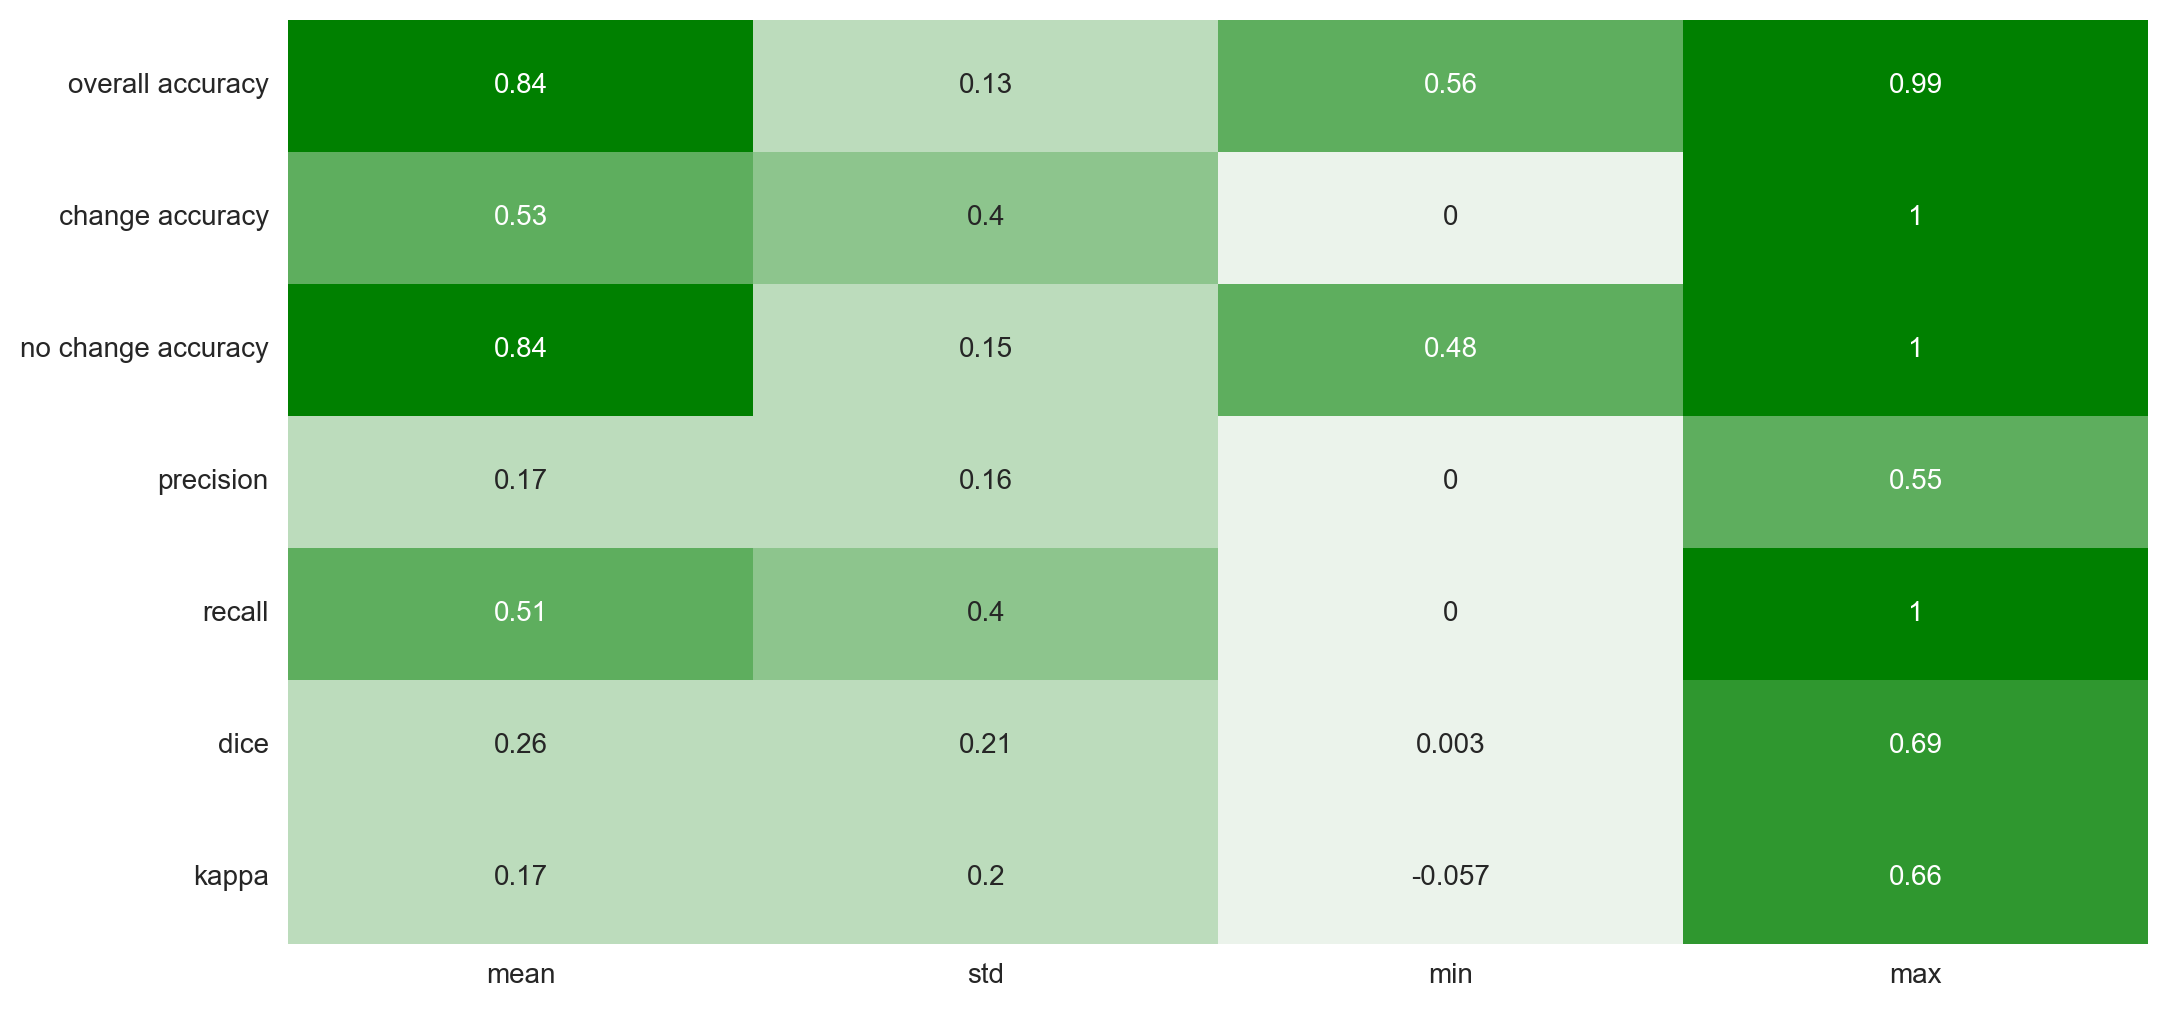

In [12]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [14]:
model = FCFERes(6, 2)
state = torch.load(f"./last-checkpoint.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

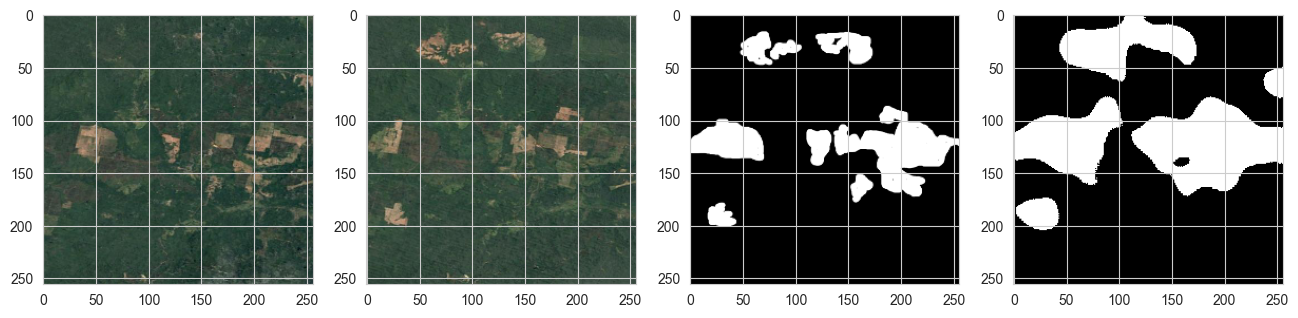

In [24]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')